In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("/content/titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945.0,TV-MA,51.0,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976.0,R,114.0,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972.0,R,109.0,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975.0,PG,91.0,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967.0,NaN,150.0,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2730.000000,2730.000000,958.000000,2612.000000,2.609000e+03,2692.000000,2609.000000
mean,2012.343223,80.418315,3.132568,6.709456,3.863953e+04,19.516318,6.789775
std,8.378798,41.333526,3.676603,1.128917,1.322274e+05,63.811657,1.068107
min,1945.000000,0.000000,1.000000,1.500000,6.000000e+00,0.009442,0.500000
25%,2011.000000,44.000000,1.000000,6.000000,8.000000e+02,3.166750,6.100000
50%,2016.000000,88.000000,2.000000,6.800000,3.690000e+03,7.655500,6.800000
75%,2017.000000,107.000000,4.000000,7.500000,1.845300e+04,17.464250,7.500000
max,2018.000000,240.000000,42.000000,9.600000,2.294231e+06,2226.231000,10.000000


In [4]:
df["seasons"]=df["seasons"].fillna(0)  #Number of seasons for movies is absurd.We are assigning all movies as zero-seasoned.
df["imdb_score"]=df["imdb_score"].fillna(df["imdb_score"].mean())
df["imdb_votes"]=df["imdb_votes"].fillna(df["imdb_votes"].median())
df["tmdb_popularity"]=df["tmdb_popularity"].fillna(df["tmdb_popularity"].median())
df["tmdb_score"]=df["tmdb_score"].fillna(df["tmdb_score"].mean())    #filling the null values with suitable central tendencies.
df2=df.drop(["imdb_id","description","age_certification"], axis=1)    #Some features are filled of null values & some are not important features,we should drop the columns.
df2.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945.0,51.0,['documentation'],['US'],1.0,6.709456,3690.0,0.600,6.789775
1,tm84618,Taxi Driver,MOVIE,1976.0,114.0,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972.0,109.0,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975.0,91.0,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967.0,150.0,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000


In [5]:
df2=df2.dropna()

In [6]:
df2.isna().sum()

id                      0
title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [7]:
df2.shape

(2729, 12)

In [8]:
vc=df2["type"].value_counts()
vc

MOVIE    1771
SHOW      958
Name: type, dtype: int64

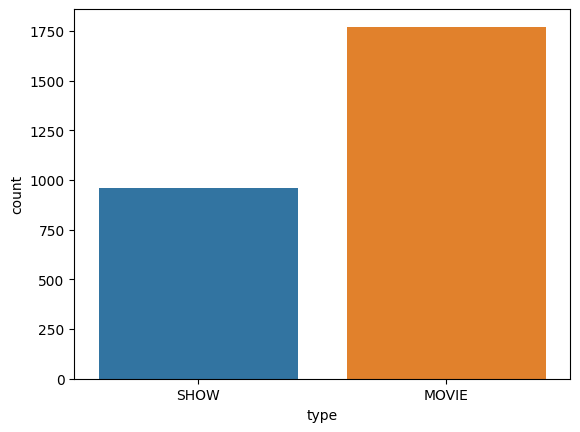

<Figure size 600x600 with 0 Axes>

In [9]:
sns.countplot(data= df2, x="type")
plt.figure(figsize= (6,6), label=vc)
plt.show()


In [10]:
df2.dtypes

id                       object
title                    object
type                     object
release_year            float64
runtime                 float64
genres                   object
production_countries     object
seasons                 float64
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2729 entries, 0 to 2729
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2729 non-null   object 
 1   title                 2729 non-null   object 
 2   type                  2729 non-null   object 
 3   release_year          2729 non-null   float64
 4   runtime               2729 non-null   float64
 5   genres                2729 non-null   object 
 6   production_countries  2729 non-null   object 
 7   seasons               2729 non-null   float64
 8   imdb_score            2729 non-null   float64
 9   imdb_votes            2729 non-null   float64
 10  tmdb_popularity       2729 non-null   float64
 11  tmdb_score            2729 non-null   float64
dtypes: float64(7), object(5)
memory usage: 277.2+ KB


In [12]:
df2.drop_duplicates()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945.0,51.0,['documentation'],['US'],1.0,6.709456,3690.0,0.600,6.789775
1,tm84618,Taxi Driver,MOVIE,1976.0,114.0,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972.0,109.0,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975.0,91.0,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967.0,150.0,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2725,tm324806,Counterpunch,MOVIE,2017.0,91.0,"['documentation', 'sport']",['US'],0.0,6.700000,918.0,11.366,6.700000
2726,tm436171,El Potro: lo mejor del amor,MOVIE,2018.0,122.0,"['drama', 'music']",['AR'],0.0,5.200000,723.0,3.600,4.800000
2727,tm431928,Rajma Chawal,MOVIE,2018.0,129.0,"['drama', 'comedy', 'family']",['IN'],0.0,5.700000,1853.0,3.305,6.500000
2728,ts82705,Cupcake & Dino - General Services,SHOW,2018.0,18.0,"['animation', 'comedy', 'action', 'family']","['CA', 'BR']",2.0,7.500000,694.0,4.925,8.800000


In [13]:
df2["genres"]=df2["genres"].to_numpy().astype(str)
df2["production_countries"]=df2["production_countries"].to_numpy().astype(str)
df2

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945.0,51.0,['documentation'],['US'],1.0,6.709456,3690.0,0.600,6.789775
1,tm84618,Taxi Driver,MOVIE,1976.0,114.0,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972.0,109.0,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975.0,91.0,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967.0,150.0,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2725,tm324806,Counterpunch,MOVIE,2017.0,91.0,"['documentation', 'sport']",['US'],0.0,6.700000,918.0,11.366,6.700000
2726,tm436171,El Potro: lo mejor del amor,MOVIE,2018.0,122.0,"['drama', 'music']",['AR'],0.0,5.200000,723.0,3.600,4.800000
2727,tm431928,Rajma Chawal,MOVIE,2018.0,129.0,"['drama', 'comedy', 'family']",['IN'],0.0,5.700000,1853.0,3.305,6.500000
2728,ts82705,Cupcake & Dino - General Services,SHOW,2018.0,18.0,"['animation', 'comedy', 'action', 'family']","['CA', 'BR']",2.0,7.500000,694.0,4.925,8.800000


In [14]:
df2.dtypes

id                       object
title                    object
type                     object
release_year            float64
runtime                 float64
genres                   object
production_countries     object
seasons                 float64
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [15]:
df2[df2["genres"].str.contains('action')]

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,1972.0,109.0,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975.0,91.0,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967.0,150.0,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600
7,tm14873,Dirty Harry,MOVIE,1971.0,102.0,"['thriller', 'action', 'crime']",['US'],0.0,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,1967.0,110.0,"['crime', 'drama', 'action']",['US'],0.0,7.7,112048.0,15.687,7.500
...,...,...,...,...,...,...,...,...,...,...,...,...
2691,tm413129,Goyo: The Boy General,MOVIE,2018.0,155.0,"['action', 'war', 'history']",['PH'],0.0,6.7,799.0,3.961,7.000
2697,tm283322,Burning Sands,MOVIE,2017.0,105.0,"['drama', 'thriller', 'action']",['US'],0.0,6.0,2854.0,9.374,5.800
2715,tm456983,Mauli,MOVIE,2018.0,134.0,"['action', 'drama']",['IN'],0.0,5.5,365.0,1.025,5.000
2719,tm319310,CIA: Comrade In America,MOVIE,2017.0,134.0,"['action', 'romance', 'drama']",['IN'],0.0,6.4,3088.0,2.548,6.000


<Axes: >

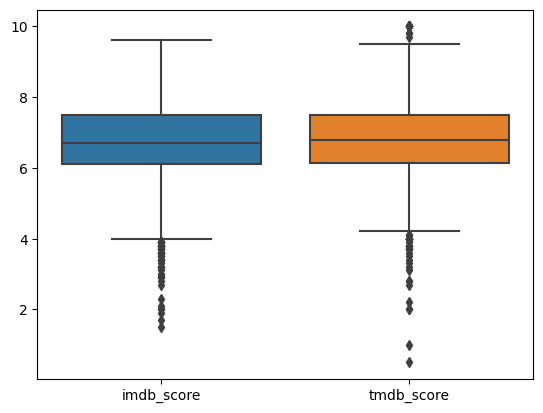

In [16]:
sns.boxplot(df2[['imdb_score','tmdb_score']])

<Axes: >

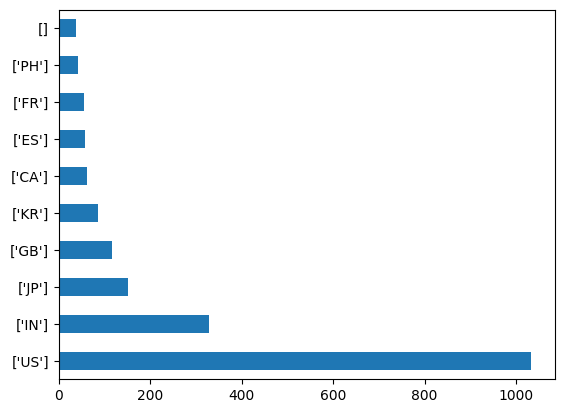

In [17]:
df2["production_countries"].value_counts()[:10].plot(kind='barh')

<Axes: >

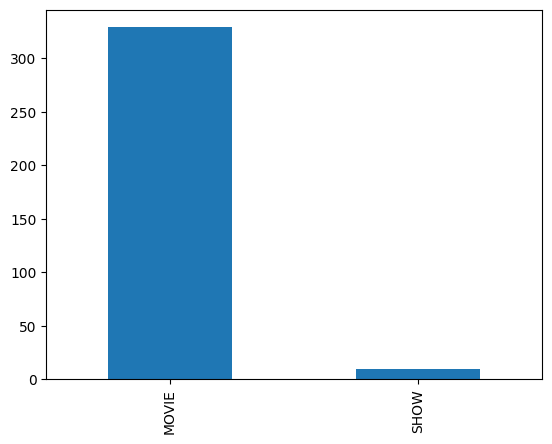

In [18]:
df2[df2["production_countries"].str.contains('IN')].type.value_counts().plot(kind='bar')

In [19]:
dfm=df2[df2["type"]=="MOVIE"]
dfs=df2[df2["type"]=="SHOW"]

<Axes: >

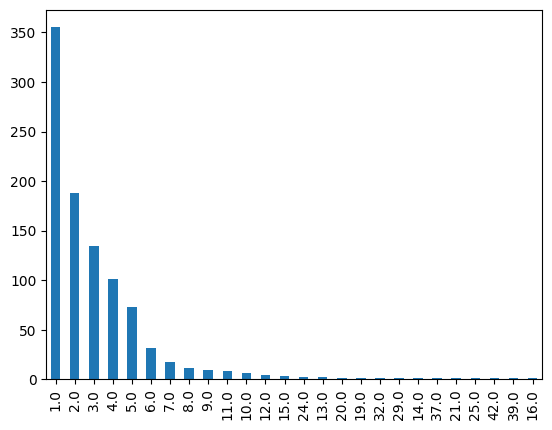

In [20]:
dfs["seasons"].value_counts().plot(kind='bar')

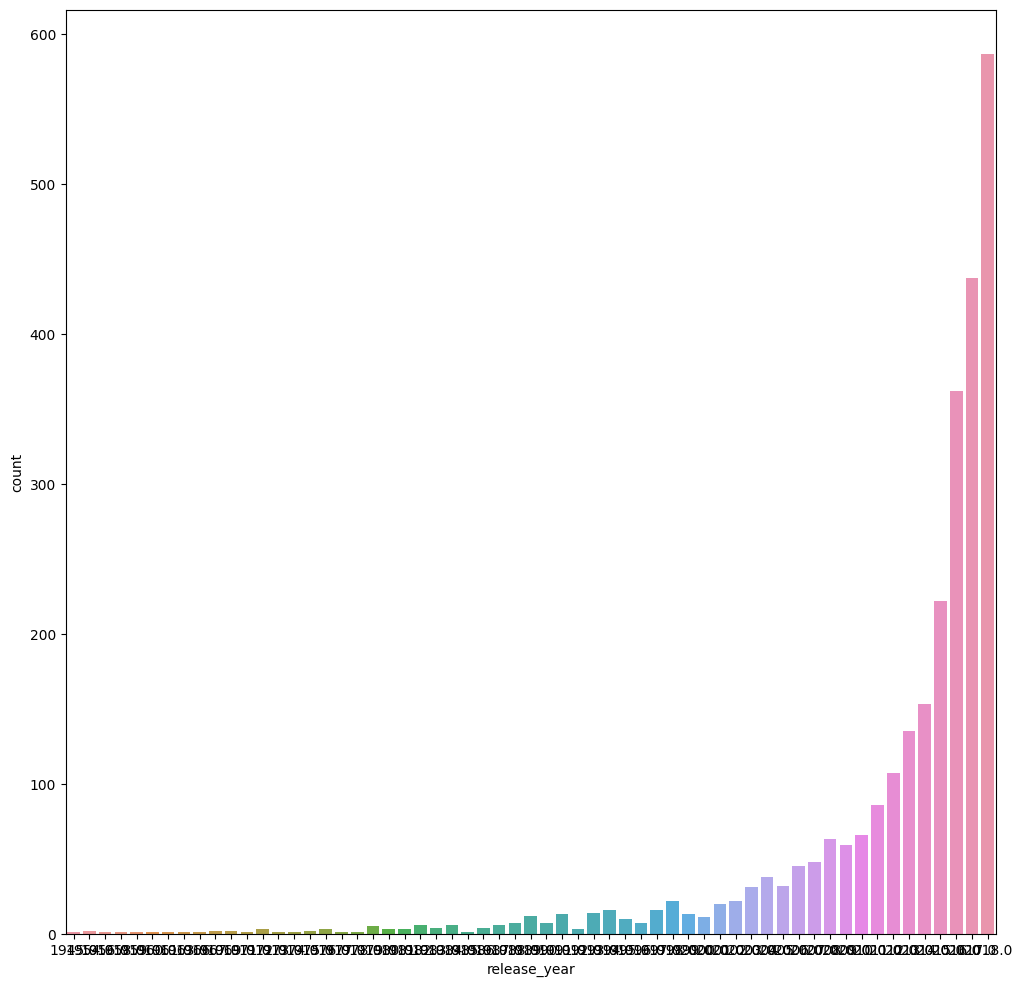

In [21]:
plt.figure(figsize=(12,12))
sns.countplot(x='release_year', data=df2)
plt.show()

<Axes: xlabel='imdb_score', ylabel='tmdb_score'>

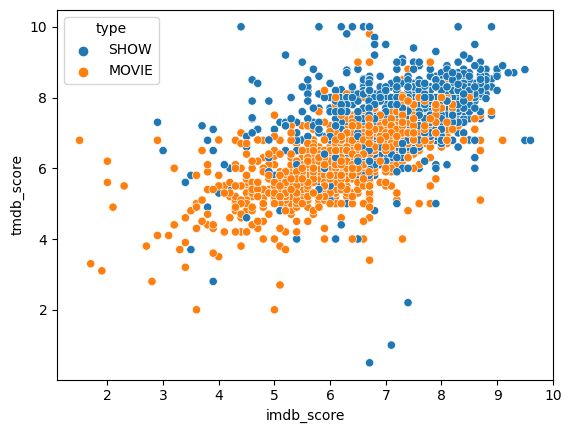

In [22]:
sns.scatterplot(x="imdb_score", y="tmdb_score", hue="type", data=df2)

<Figure size 1200x1200 with 0 Axes>

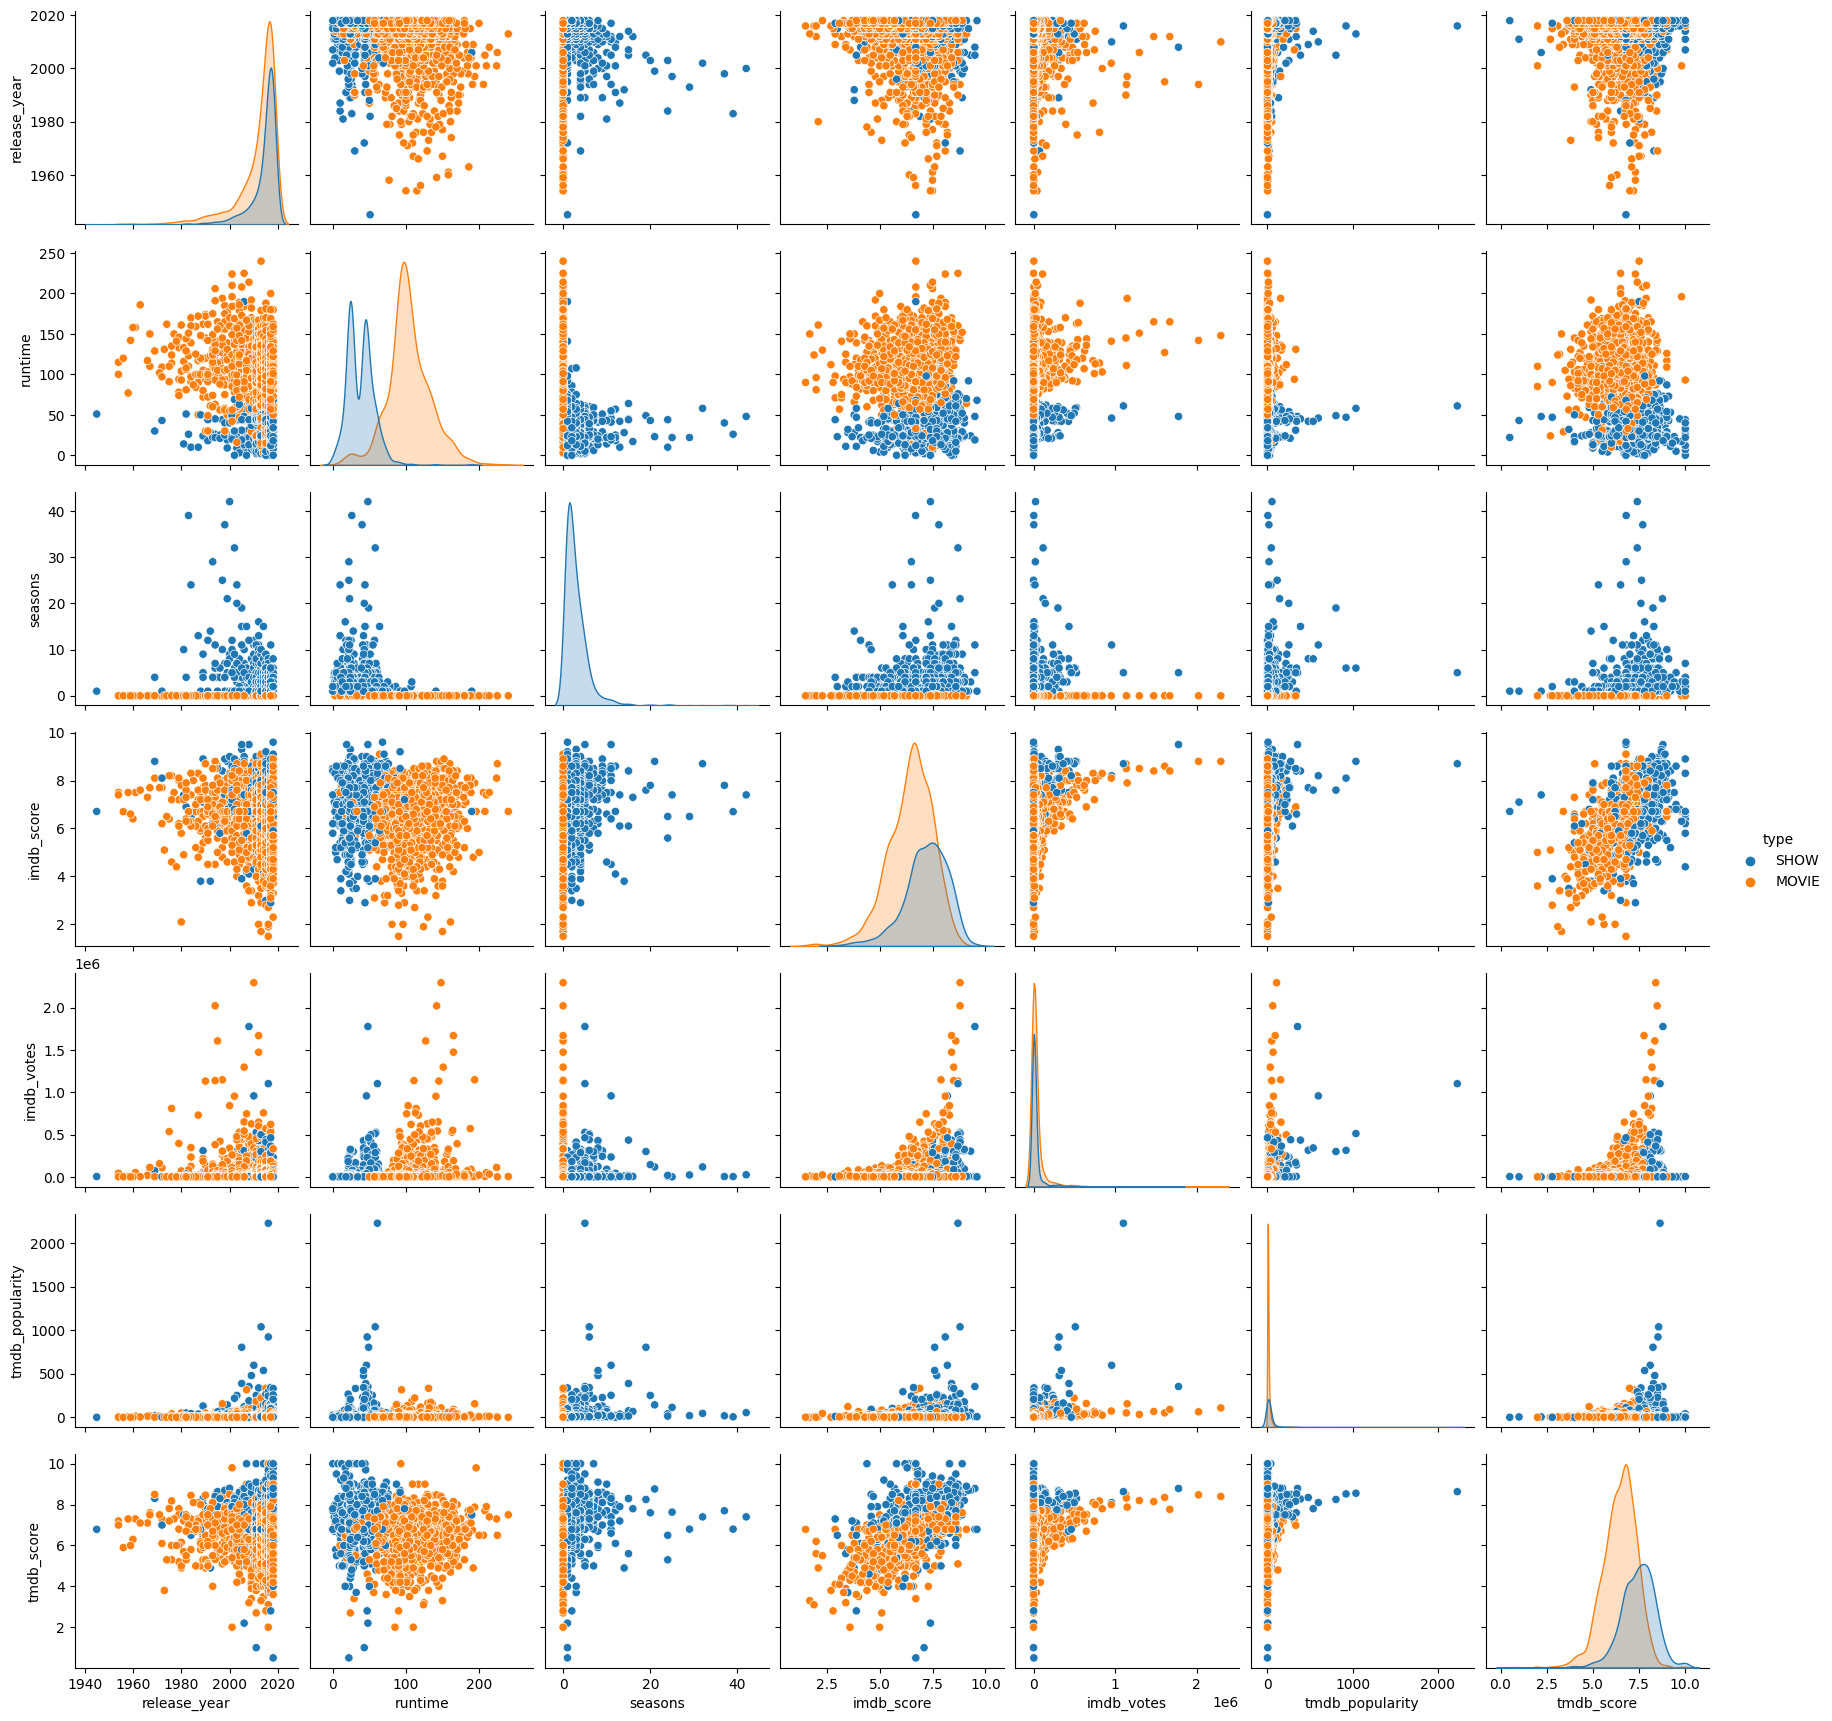

In [23]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df2, hue="type")
plt.show()